In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math

In [2]:
frame_0 = cv2.imread('../imgs/objs2/IMG_20210414_122947.jpg',0)
frame_n = cv2.imread('../imgs/objs2/IMG_20210414_123012.jpg',0)

In [3]:
absdiff = cv2.absdiff(frame_0,frame_n)
ret, absdiff_thresh = cv2.threshold(absdiff,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [4]:
ret,thresh_0 = cv2.threshold(frame_0,150,255,cv2.THRESH_BINARY_INV)
ret,thresh_n = cv2.threshold(frame_n,150,255,cv2.THRESH_BINARY_INV)

In [5]:
thresh_absdiff = cv2.absdiff(thresh_0,thresh_n)

In [6]:
shadow = cv2.bitwise_and(absdiff_thresh , thresh_absdiff)

In [7]:
result = cv2.morphologyEx(shadow, cv2.MORPH_ERODE, (5, 5))
result = cv2.morphologyEx(result, cv2.MORPH_ERODE, (5, 5))
result = cv2.morphologyEx(result, cv2.MORPH_OPEN, (5, 5))

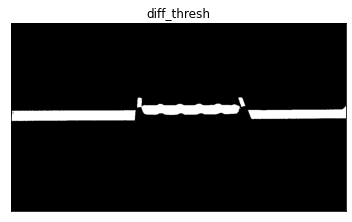

In [8]:
plt.imshow(result, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()